<a href="https://colab.research.google.com/github/Mildredkulei7/Moringa_core_IP_W4/blob/main/Moringa_DSC_IP_W4_Mildred_Kulei.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Overview

Just like before, we have been tasked to understand electric car usage by solving for another research question. We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. An example of claim to test would be "Is the number of Bluecars taken in area X different than in area Y? Is it greater in area X than in area Z? Etc”. The selected periods of interest be either weekdays or weekends but not a mix of both. You can also consider postal codes 75015 vs 75017 to some of the areas of interest. 

To work on this project, we will perform the following analysis with Python; 

* Find and deal with outliers, anomalies, and missing data within the dataset.
* Plot appropriate univariate and bivariate summaries recording our observations.
* Implement the solution by performing hypothesis testing.
 * This will need to be documented when writing the report.

## 1. Defining The Question

### A). Specifying the hypothesis claim

To investigate a claim that the average number of blue cars taken during weekends is high compared to weekdays.

### B). Defining metric for success

Finding if the mean for the blue cars taken during weekends and weekdays.

### C). Understanding the context

 We will work as a Data Scientist for the Autolib electric car-sharing service company to investigate a claim about the blue cars from the provided Autolib dataset.

In an effort to do this, we need to identify some areas and periods of interest via sampling stating the reason to the choice of method, then perform hypothesis testing with regards to the claim that we will have made. 

The goal is to test if there are difference in number of blue cars taken during the week and on weekends so as to help the Autolib company plan how they will improve their services to its customers.

### D). Recording the experimental Design

* 1.Defining the question
* 2.Importing the libraries
* 3.Reading the data
* 4.Data cleaning
* 5.Exploratory data analysis(Univeriate and Bivariate summaries)
* 6.Hypothesis
* 7.Conclusion
* 8.Recommendation

## 2. Importing Libraries

In [49]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline 

## 3. Reading The Data

In [2]:
#loading the description data
variable_definition = pd.read_excel('/content/columns_explanation.xlsx')
variable_definition

,Column name,explanation
0,Postal code,postal code of the area (in Paris)
1,date,date of the row aggregation
2,n_daily_data_points,number of daily data poinst that were availabl...
3,dayOfWeek,identifier of weekday (0: Monday -> 6: Sunday)
4,day_type,weekday or weekend
5,BlueCars_taken_sum,Number of bluecars taken that date in that area
6,BlueCars_returned_sum,Number of bluecars returned that date in that ...
7,Utilib_taken_sum,Number of Utilib taken that date in that area
8,Utilib_returned_sum,Number of Utilib returned that date in that area
9,Utilib_14_taken_sum,Number of Utilib 1.4 taken that date in that area


In [3]:
autolib_df= pd.read_csv('/content/autolib_daily_events_postal_code.csv')
autolib_df

,Postal code,date,n_daily_data_points,dayOfWeek,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22
2,75001,1/3/2018,1439,2,weekday,138,139,0,0,2,2,27,27
3,75001,1/4/2018,1320,3,weekday,104,104,2,2,9,8,25,21
4,75001,1/5/2018,1440,4,weekday,114,117,3,3,6,6,18,20
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16080,95880,6/15/2018,1440,4,weekday,15,10,0,0,2,3,0,0
16081,95880,6/16/2018,1440,5,weekend,19,19,0,0,2,1,0,0
16082,95880,6/17/2018,1440,6,weekend,33,35,1,1,0,0,0,0
16083,95880,6/18/2018,1440,0,weekday,11,14,3,5,2,2,0,0


In [4]:
autolib_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Postal code             16085 non-null  int64 
 1   date                    16085 non-null  object
 2   n_daily_data_points     16085 non-null  int64 
 3   dayOfWeek               16085 non-null  int64 
 4   day_type                16085 non-null  object
 5   BlueCars_taken_sum      16085 non-null  int64 
 6   BlueCars_returned_sum   16085 non-null  int64 
 7   Utilib_taken_sum        16085 non-null  int64 
 8   Utilib_returned_sum     16085 non-null  int64 
 9   Utilib_14_taken_sum     16085 non-null  int64 
 10  Utilib_14_returned_sum  16085 non-null  int64 
 11  Slots_freed_sum         16085 non-null  int64 
 12  Slots_taken_sum         16085 non-null  int64 
dtypes: int64(11), object(2)
memory usage: 1.6+ MB


In [5]:
autolib_df.describe()

,Postal code,n_daily_data_points,dayOfWeek,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
count,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000,16085.000000
mean,88791.293876,1431.330619,2.969599,125.926951,125.912714,3.698290,3.699099,8.600560,8.599192,22.629033,22.629282
std,7647.342000,33.212050,2.008378,185.426579,185.501535,5.815058,5.824634,12.870098,12.868993,52.120263,52.146030
min,75001.000000,1174.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,91330.000000,1439.000000,1.000000,20.000000,20.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
50%,92340.000000,1440.000000,3.000000,46.000000,46.000000,1.000000,1.000000,3.000000,3.000000,0.000000,0.000000
75%,93400.000000,1440.000000,5.000000,135.000000,135.000000,4.000000,4.000000,10.000000,10.000000,5.000000,5.000000
max,95880.000000,1440.000000,6.000000,1352.000000,1332.000000,54.000000,58.000000,100.000000,101.000000,360.000000,359.000000


## 4. Data Cleaning

In [6]:
#checking number of records in the dataset
autolib_df.shape

(16085, 13)

There are 13 columns and 16085 rows of records

In [7]:
#checking  for duplicates
autolib_df.duplicated().sum()

0

In [8]:
#checking for null values
autolib_df.isnull().sum()

Postal code               0
date                      0
n_daily_data_points       0
dayOfWeek                 0
day_type                  0
BlueCars_taken_sum        0
BlueCars_returned_sum     0
Utilib_taken_sum          0
Utilib_returned_sum       0
Utilib_14_taken_sum       0
Utilib_14_returned_sum    0
Slots_freed_sum           0
Slots_taken_sum           0
dtype: int64

In [9]:
#renaming some of the colunms, to match the rest of column names
autolib_df2 = autolib_df.rename({'Postal code': 'postal_code', 'dayOfWeek': 'day_of_the_week'}, axis=1)
autolib_df2.head(2)

,postal_code,date,n_daily_data_points,day_of_the_week,day_type,BlueCars_taken_sum,BlueCars_returned_sum,Utilib_taken_sum,Utilib_returned_sum,Utilib_14_taken_sum,Utilib_14_returned_sum,Slots_freed_sum,Slots_taken_sum
0,75001,1/1/2018,1440,0,weekday,110,103,3,2,10,9,22,20
1,75001,1/2/2018,1438,1,weekday,98,94,1,1,8,8,23,22


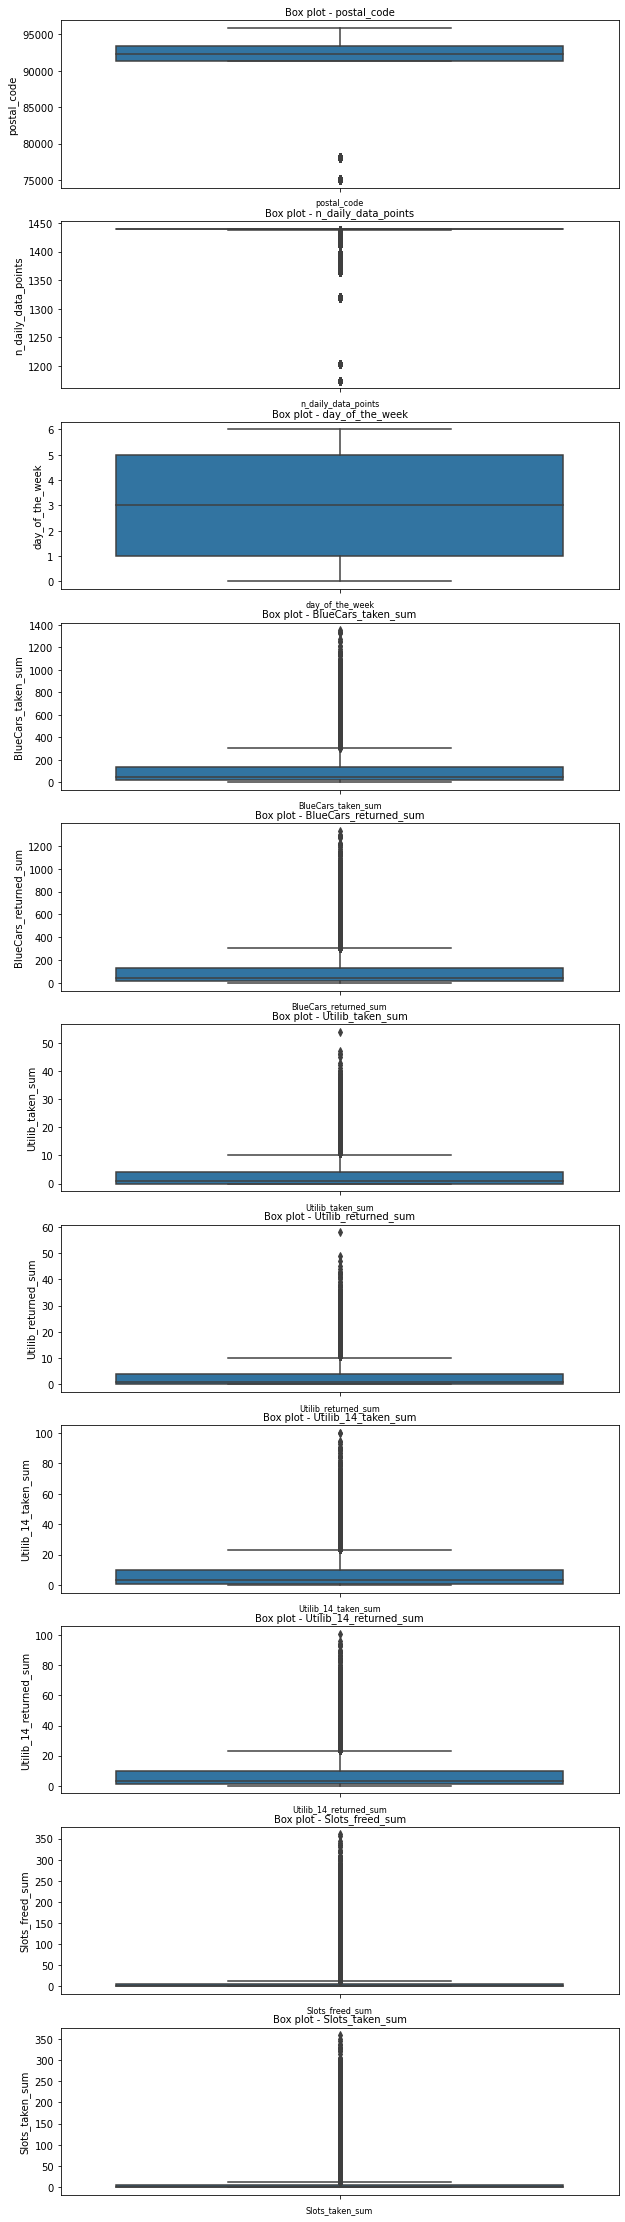

In [10]:
#Checking for outliers
col_names =['postal_code','n_daily_data_points', 'day_of_the_week', 'BlueCars_taken_sum', 'BlueCars_returned_sum', 'Utilib_taken_sum', 
            'Utilib_returned_sum', 'Utilib_14_taken_sum', 'Utilib_14_returned_sum', 'Slots_freed_sum', 'Slots_taken_sum']

fig, ax= plt.subplots(len(col_names), figsize=(10,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y= autolib_df2[col_val], ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10 )
  ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

#days of the week is the only outlier that does not have outliers

From the boxplot above we can see that Postal code and daily data points have outliers that need to ba acted upon

In [11]:
#removing outliers
def remove_outlier(col):
  sorted(col)
  Q1,Q3=col.quantile([0.25,0.75])
  IQR=Q3-Q1
  Lower_range= Q1-(1.5 * IQR)
  Upper_range= Q3+(1.5 * IQR)
  return Lower_range, Upper_range

In [12]:
lowscore,highscore =remove_outlier(autolib_df2['postal_code'])
autolib_df2['postal_code']=np.where(autolib_df2['postal_code']>highscore,highscore,autolib_df2['postal_code'])
autolib_df2['postal_code']=np.where(autolib_df2['postal_code']<lowscore,lowscore,autolib_df2['postal_code'])

In [13]:
lowscore,highscore =remove_outlier(autolib_df2['n_daily_data_points'])
autolib_df2['n_daily_data_points']=np.where(autolib_df2['n_daily_data_points']>highscore,highscore,autolib_df2['n_daily_data_points'])
autolib_df2['n_daily_data_points']=np.where(autolib_df2['n_daily_data_points']<lowscore,lowscore,autolib_df2['n_daily_data_points'])

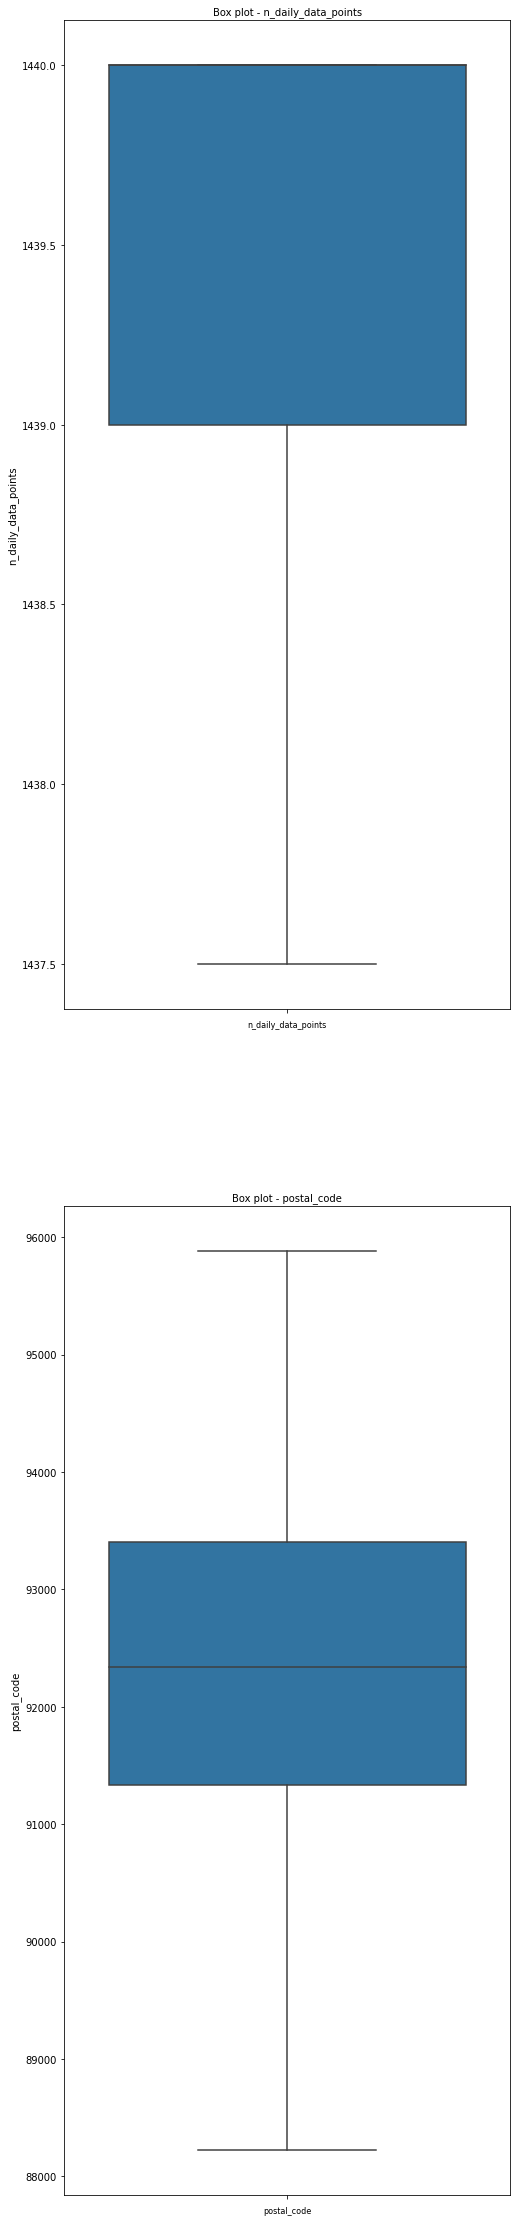

In [14]:
#confirming if the outliers where removed
col_names =['n_daily_data_points','postal_code']

fig, ax= plt.subplots(len(col_names), figsize=(8,40))

for i, col_val in enumerate(col_names):
  sns.boxplot(y= autolib_df2[col_val], ax=ax[i])
  ax[i].set_title('Box plot - {}'.format(col_val), fontsize=10 )
  ax[i].set_xlabel(col_val, fontsize=8)
plt.show()

In [18]:
#deleting columns that we will not use since our focus is only on blue cars

autolib_blue = autolib_df2[['date', 'day_type', 'BlueCars_taken_sum']]
autolib_blue
              

,date,day_type,BlueCars_taken_sum
0,1/1/2018,weekday,110
1,1/2/2018,weekday,98
2,1/3/2018,weekday,138
3,1/4/2018,weekday,104
4,1/5/2018,weekday,114
...,...,...,...
16080,6/15/2018,weekday,15
16081,6/16/2018,weekend,19
16082,6/17/2018,weekend,33
16083,6/18/2018,weekday,11


In [19]:
autolib_blue.head()

,date,day_type,BlueCars_taken_sum
0,1/1/2018,weekday,110
1,1/2/2018,weekday,98
2,1/3/2018,weekday,138
3,1/4/2018,weekday,104
4,1/5/2018,weekday,114


In [20]:
autolib_blue.tail()

,date,day_type,BlueCars_taken_sum
16080,6/15/2018,weekday,15
16081,6/16/2018,weekend,19
16082,6/17/2018,weekend,33
16083,6/18/2018,weekday,11
16084,6/19/2018,weekday,2


In [21]:
autolib_blue['date'] = pd.to_datetime(autolib_blue['date'])
autolib_blue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                16085 non-null  datetime64[ns]
 1   day_type            16085 non-null  object        
 2   BlueCars_taken_sum  16085 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 377.1+ KB


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [23]:
#to separate year, month day in different column
autolib_blue['year']= autolib_blue['date'].dt.year
autolib_blue['month']= autolib_blue['date'].dt.month
autolib_blue['day']= autolib_blue['date'].dt.day
autolib_blue

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

,date,day_type,BlueCars_taken_sum,year,month,day
0,2018-01-01,weekday,110,2018,1,1
1,2018-01-02,weekday,98,2018,1,2
2,2018-01-03,weekday,138,2018,1,3
3,2018-01-04,weekday,104,2018,1,4
4,2018-01-05,weekday,114,2018,1,5
...,...,...,...,...,...,...
16080,2018-06-15,weekday,15,2018,6,15
16081,2018-06-16,weekend,19,2018,6,16
16082,2018-06-17,weekend,33,2018,6,17
16083,2018-06-18,weekday,11,2018,6,18


In [25]:
#drop year column since the dataset is from only one yaer, 2018
autolib_blue = autolib_blue.drop("year", axis=1)
autolib_blue

,date,day_type,BlueCars_taken_sum,month,day
0,2018-01-01,weekday,110,1,1
1,2018-01-02,weekday,98,1,2
2,2018-01-03,weekday,138,1,3
3,2018-01-04,weekday,104,1,4
4,2018-01-05,weekday,114,1,5
...,...,...,...,...,...
16080,2018-06-15,weekday,15,6,15
16081,2018-06-16,weekend,19,6,16
16082,2018-06-17,weekend,33,6,17
16083,2018-06-18,weekday,11,6,18


## 5. EDA

### A). Univariate Summaries

In [26]:
autolib_blue.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16085 entries, 0 to 16084
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   date                16085 non-null  datetime64[ns]
 1   day_type            16085 non-null  object        
 2   BlueCars_taken_sum  16085 non-null  int64         
 3   month               16085 non-null  int64         
 4   day                 16085 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 628.4+ KB


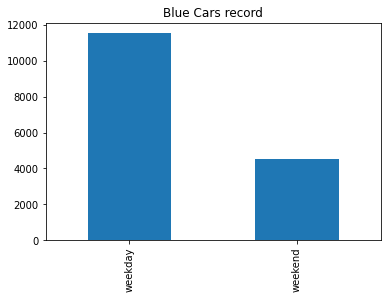

In [27]:
autolib_blue['day_type'].value_counts().plot.bar()
plt.title('Blue Cars record');

In [28]:
autolib_blue.describe()

,BlueCars_taken_sum,month,day
count,16085.000000,16085.000000,16085.000000
mean,125.926951,3.259061,14.849487
std,185.426579,1.641136,8.845698
min,0.000000,1.000000,1.000000
25%,20.000000,2.000000,7.000000
50%,46.000000,3.000000,14.000000
75%,135.000000,5.000000,22.000000
max,1352.000000,6.000000,31.000000


In [30]:
#mode of blue cars taken
autolib_blue['BlueCars_taken_sum'].mode()
#it is unimodal

0    12
dtype: int64

In [31]:
#mode of the months
autolib_blue['month'].mode()

#it is unimodal

0    1
dtype: int64

In [32]:
#mode of days
autolib_blue['day'].mode()

#distribution is trimodal

0    1
1    3
2    4
dtype: int64

In [33]:
#range

print('the range of the blue cars taken is '+ str(autolib_blue['BlueCars_taken_sum'].max() - autolib_blue['BlueCars_taken_sum'].min()))
print('the range of the month is '+ str(autolib_blue['month'].max() - autolib_blue['month'].min()))
print('the range of the day is '+ str(autolib_blue['day'].max() - autolib_blue['day'].min()))

#the range shows that the data was collected in 6 months, there are 1353 records of taken cars, and 31 days in a month.

the range of the blue cars taken is 1352
the range of the month is 5
the range of the day is 30


In [34]:
#variance

autolib_blue['BlueCars_taken_sum'].var()

34383.01611333789

In [35]:
#Variance
autolib_blue['month'].var()

2.693328265647899

In [36]:
#variance
autolib_blue['day'].var()

78.24636957650931


low variance show how mass of the points are centered around and greater the variance the greater the spread.

In [37]:
#skewness of taken blue cars
autolib_blue['BlueCars_taken_sum'].skew()

2.4063548974959086

In [38]:
#skewness of the months
autolib_blue['month'].skew()

0.14852970996871903

In [39]:
#skewness of the day
autolib_blue['day'].skew()

0.12923139864706631

The positive values shows that the tail of data is right-skewed

In [40]:
#kurtosis of blue cars taken
autolib_blue['BlueCars_taken_sum'].kurt()

6.172692305510042

Positive values of kurtosis indicate that a distribution is peaked and possess thick tails. This is a Leptokurtic distribution.

In [41]:
#kurtosis of the months
autolib_blue['month'].kurt()

-1.1113560206749586

In [42]:
#kurtosis of days
autolib_blue['day'].kurt()

-1.1889891729784325

Negative values of kurtosis indicate that a distribution is flat and has thin tails. This is a Platykurtic distribution.

### B). Bivariate Summaries

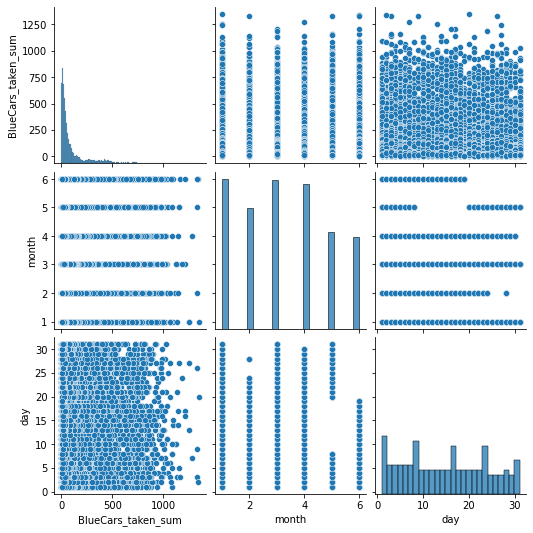

In [29]:
sns.pairplot(autolib_blue)
plt.show()
##this shows that there is no relationship between the numericals

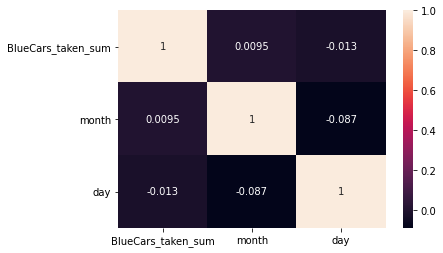

In [50]:
sns.heatmap(autolib_blue.corr(), annot=True)
plt.show()
#it clearly show how the numerical data have no relationship

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


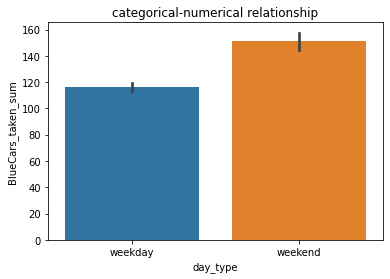

In [58]:
#plt.figure(figsize=(12,6))
plt.title('categorical-numerical relationship')
sns.barplot(autolib_blue['day_type'], y= autolib_blue['BlueCars_taken_sum'])
 
# Show the plot
plt.show();

#it shows the avarage of blue cars taken on weekdays is smaller than on weekends.

In [65]:
#grouping mean of blue cars taken by the type of month
month_type= autolib_blue.groupby(['month'], as_index=False)['BlueCars_taken_sum'].mean().sort_values(by='BlueCars_taken_sum',ascending=False)
month_type

,month,BlueCars_taken_sum
5,6,131.380102
4,5,127.436959
2,3,127.231083
0,1,126.189045
3,4,124.467679
1,2,120.368442


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


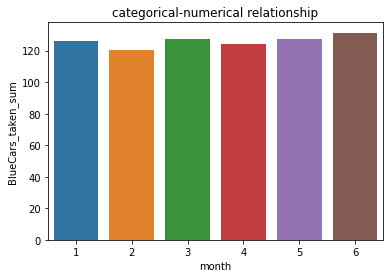

In [70]:
plt.title('categorical-numerical relationship')
sns.barplot(month_type['month'], y= month_type['BlueCars_taken_sum'])
 
# Show the plot
plt.show();

## 6. Hypothesis testing

Null Hypothesis: There is no difference in the average number of blue cars taken during the week and on weekends.

Alternate Hypothesis: There is difference in the average number of blue cars taken during the week and on weekends(claim)

In [71]:
#taking a stratified sample of month 6.

autolib_blue_final= autolib_blue[(autolib_blue['month']== 6)]
autolib_blue_final

,date,day_type,BlueCars_taken_sum,month,day
137,2018-06-01,weekday,116,6,1
138,2018-06-02,weekend,254,6,2
139,2018-06-03,weekend,196,6,3
140,2018-06-04,weekday,99,6,4
141,2018-06-05,weekday,137,6,5
...,...,...,...,...,...
16080,2018-06-15,weekday,15,6,15
16081,2018-06-16,weekend,19,6,16
16082,2018-06-17,weekend,33,6,17
16083,2018-06-18,weekday,11,6,18


In [72]:
#dividing the dataset into two in regards to the type of the week
weekday = autolib_blue_final[(autolib_blue_final['day_type']=='weekday')]
weekend = autolib_blue_final[(autolib_blue_final['day_type']=='weekend')]

In [75]:
weekday.head()

,date,day_type,BlueCars_taken_sum,month,day
137,2018-06-01,weekday,116,6,1
140,2018-06-04,weekday,99,6,4
141,2018-06-05,weekday,137,6,5
142,2018-06-06,weekday,109,6,6
143,2018-06-07,weekday,113,6,7


In [76]:
weekend.head()

,date,day_type,BlueCars_taken_sum,month,day
138,2018-06-02,weekend,254,6,2
139,2018-06-03,weekend,196,6,3
145,2018-06-09,weekend,185,6,9
146,2018-06-10,weekend,146,6,10
152,2018-06-16,weekend,203,6,16


In [85]:
weekday.shape[0]
#there are 1338 records in weekday dataset

1338

In [86]:
weekend.shape[0]
#there are 622 records in weekend dataset

622

In [77]:
#calculating the mean, standard deviation and the sample size of both weekday and weekend datasets
m1, m2 = weekday['BlueCars_taken_sum'].mean(), weekend['BlueCars_taken_sum'].mean()
sd1, sd2 = weekday['BlueCars_taken_sum'].std(), weekend['BlueCars_taken_sum'].std()
n1, n2 = weekday.shape[0], weekend.shape[0]

In [82]:
def TwoSampZ(X1, X2, sigma1, sigma2, N1, N2):
    from numpy import sqrt, abs, round
    from scipy.stats import norm
    ovr_sigma = sqrt(sigma1**2/N1 + sigma2**2/N2)
    z = (X1 - X2)/ovr_sigma
    pval = 2*(1 - norm.cdf(abs(z)))
    return z, pval

In [100]:
#confidence level of 95%
#calculating the z score and p value of the two sample
z, p = TwoSampZ(m1, m2, sd1, sd2, n1, n2)
p_val = p
print('Z score is:', z)
print('P value is:', p_val)

Z score is: -4.301068738930045
P value is: 1.6997631802739832e-05


In [95]:
if (p_val<0.05):
    Hypothesis_Status = 'Reject Null Hypothesis : Significant'
else:
    Hypothesis_Status = 'Do not reject Null Hypothesis : Not Significant'

print (Hypothesis_Status)

Reject Null Hypothesis : Significant


## 7. Conclusion

The hypothesis test clearly show us that the null hypothesis is wrong, so we accept the alternative hypothesis and conclude that there is enough evidence that the blue cars taken on weekends are higher than blue cars taken on weekdays.

## 8. Recommendation

From the Anlysis and test done above, i recommend that the autolib company provide more cars during the weekends and have enough personel who will handle their service to ensure smooth operation.